In [1]:
# Prediction 1 : Present_Tmin 

# Import the necessary Liabrary from the system

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data from the given path and convert into the Data Frame.

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/refs/heads/main/temperature.csv")

# It will show top five elements of the DataFrame
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
# It will show total number of Rows and Column

df.shape

(7752, 25)

In [4]:
df.size

193800

In [5]:
# It will provide detail information about the Dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
# Convert the Date column object datatype into Datetime and create day,month & year column.

df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['year']=df['Date'].dt.year
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.0,8.0,2017.0
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.0,8.0,2017.0
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


In [7]:
df.drop('Date',axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


In [9]:
# It will tell us how many Null or Missing value is there is Dataset.

df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
year                 2
dtype: int64

In [10]:
# It will show the list of unique element containing by each column

for i in df:
    print(df[i].unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. nan]
[28.7 31.9 31.6 32.  31.4 32.1 31.7 31.3 32.5 30.7 32.8 30.9 32.2 32.7
 31.5 28.3 30.5 30.3 31.  30.8 30.  30.6 30.1 29.9 31.8 24.4 27.  28.
 27.7 27.8 28.8 27.6 26.9 27.5 28.6 26.2 28.4 26.7 29.  26.6 27.1 28.1
 27.9 28.5 30.4 29.1 28.9 29.4 31.1 29.5 29.6 24.9 28.2 26.1 27.2 26.5
 27.4 30.2 32.4 29.3 29.8 33.5 29.2 29.7 25.9 23.1 24.8 26.3 26.8 25.8
 25.3 25.1 24.5 25.4 26.  25.6 26.4  nan 27.3 25.2 23.3 25.7 25.  25.5
 22.4 24.6 24.2 24.7 24.3 23.6 24.1 23.  23.7 23.8 22.9 24.  22.7 31.2
 32.6 32.9 33.2 33.6 33.4 33.9 32.3 33.1 33.  34.  33.3 34.7 34.3 34.1
 33.8 33.7 35.2 34.9 34.2 34.8 35.5 34.5 34.4 35.1 21.2 23.4 23.2 23.9
 23.5 35.7 34.6 22.5 21.7 22.8 35.9 35.3 20.6 21.9 22.2 20.4 22.  35.
 36.5 35.4 35.6 21.4 21.6 22.1 22.6 37.5 20.7 21.5 36.  36.2 37.2 36.6
 35.8 36.7 36.8 37.1 36.3 37.6 36.9 36.1 20.1 22.3 21.8 36.4 20.3 20. ]
[21.4 21.6 23.3 23.4 21.9 23.5 24.4 23.6 2

In [11]:
# It will show total number of unique element each column containing.

df.nunique()

station               25
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
Day                   31
Month                  3
year                   5
dtype: int64

In [12]:
# It will show the frequency of unique elements.

for i in df:
    print(df[i].value_counts())

station
1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: count, dtype: int64
Present_Tmax
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: count, Length: 167, dtype: int64
Present_Tmin
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: count, Length: 155, dtype: int64
LDAPS_RHmin
19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
            ..
52.924568    1
60.215191    1
46.799820    1
52.227486    1
22.933014    1
Name: count, Length: 7672, dtype: int64
LDAPS_RHmax
96.525200     2
99.251968     2
100.000153    2
91.878174     2
94.79

In [13]:
# Impute the null values of descreate data.

from sklearn.impute import SimpleImputer

sim_imp=SimpleImputer(strategy='median')
fill_null=sim_imp.fit_transform(df[['station','Day','Month','year','Next_Tmin','Next_Tmax','Present_Tmax','Present_Tmin',
                                   'LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH',
                                   'LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3',
                                   'LDAPS_PPT4']])
df1=pd.DataFrame(fill_null)
df1

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,30.0,6.0,2013.0,21.2,29.1,28.7,21.4,58.255688,91.116364,...,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000
1,2.0,30.0,6.0,2013.0,22.5,30.5,31.9,21.6,52.263397,90.604721,...,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000
2,3.0,30.0,6.0,2013.0,23.9,31.1,31.6,23.3,48.690479,83.973587,...,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000
3,4.0,30.0,6.0,2013.0,24.3,31.7,32.0,23.4,58.239788,96.483688,...,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000
4,5.0,30.0,6.0,2013.0,22.5,31.2,31.4,21.9,56.174095,90.155128,...,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30.0,8.0,2017.0,18.1,28.3,23.3,17.1,26.741310,78.869858,...,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7748,24.0,30.0,8.0,2017.0,18.8,28.6,23.3,17.7,24.040634,77.294975,...,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7749,25.0,30.0,8.0,2017.0,17.4,27.8,23.2,17.4,22.933014,77.243744,...,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000
7750,13.0,16.0,7.0,2015.0,11.3,17.4,20.0,11.3,19.794666,58.936283,...,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
df[['station','Day','Month','year','Next_Tmin','Next_Tmax','Present_Tmax','Present_Tmin',
                                   'LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH',
                                   'LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3',
                                   'LDAPS_PPT4']]=df1

In [15]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.0,8.0,2017.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.0,8.0,2017.0
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,16.0,7.0,2015.0


In [16]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
year                0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64


In [18]:
# No null value is there is dataset and every column contain the correct datatype

In [19]:
# It will check the duplicate elements in the Dataset.

df.duplicated().sum()

0

In [20]:
# It will tell the short story about the dataset.

df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,year
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.769401,23.226638,56.742728,88.388529,29.614317,23.514984,7.092549,62.450457,0.368260,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.275671,22.932804,15.983875,7.467621,2015.000000
std,7.210637,2.956583,2.403093,14.597945,7.158471,2.932911,2.334099,2.173913,33.571540,0.261236,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.122585,2.483296,8.917496,0.530318,1.414122
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,1.000000,6.000000,2013.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,8.000000,2017.000000


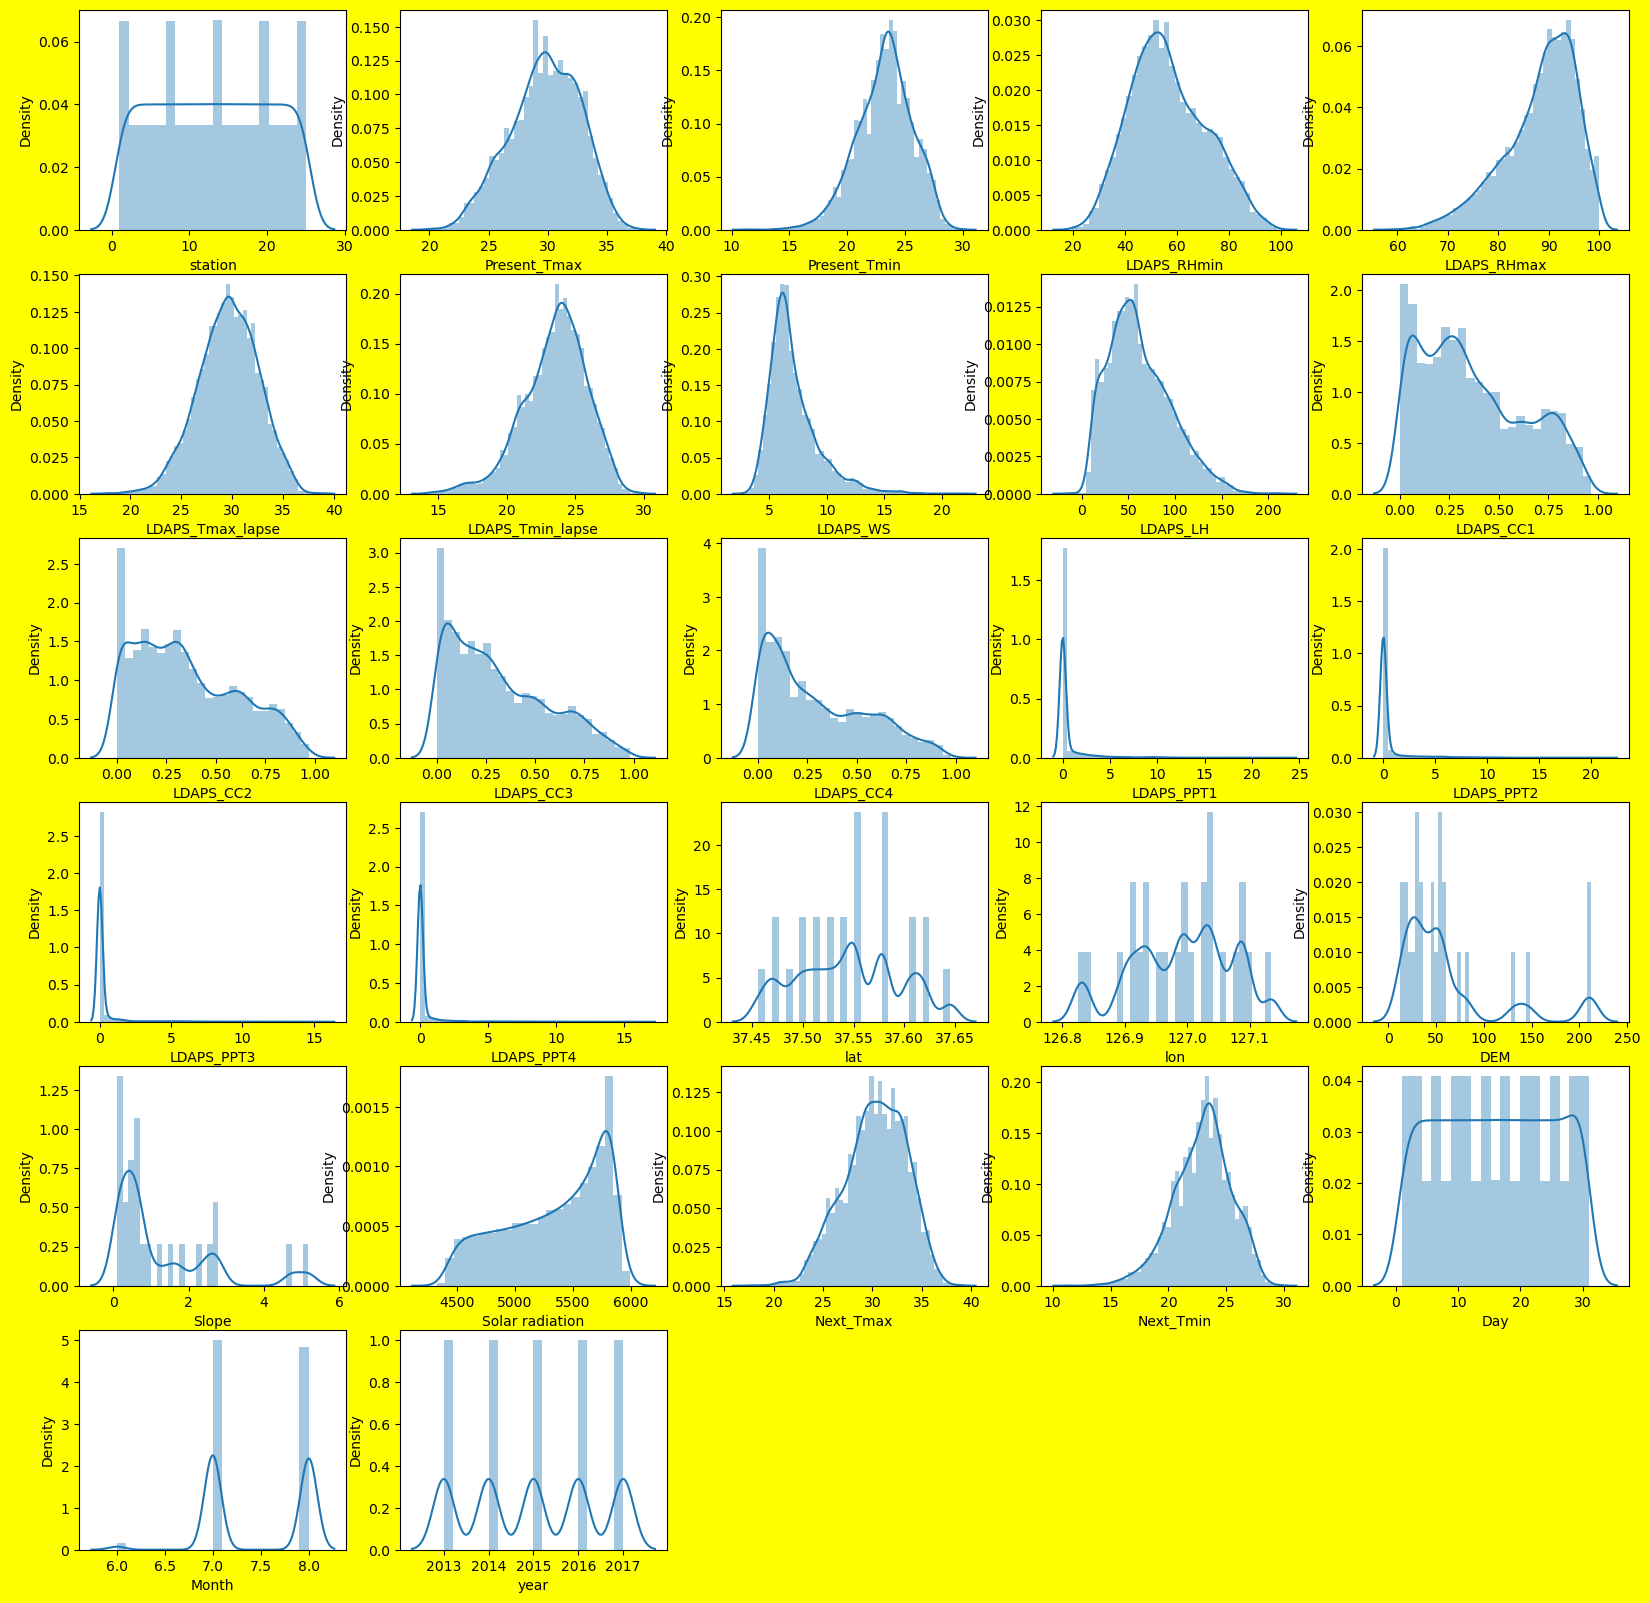

In [21]:
# After go through the dataset we assume something so now we analyse the data to check howmuch i assumption is correct

# Here we check how data is distributed, it is normally distributed or not. after view the graph we analyse some feature 
# contain skewed data and outliers.

plt.figure(figsize=(20,20),facecolor='yellow')
number=1
for i in df:
    if number<=27:
        ax=plt.subplot(6,5,number)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()                                                                                       

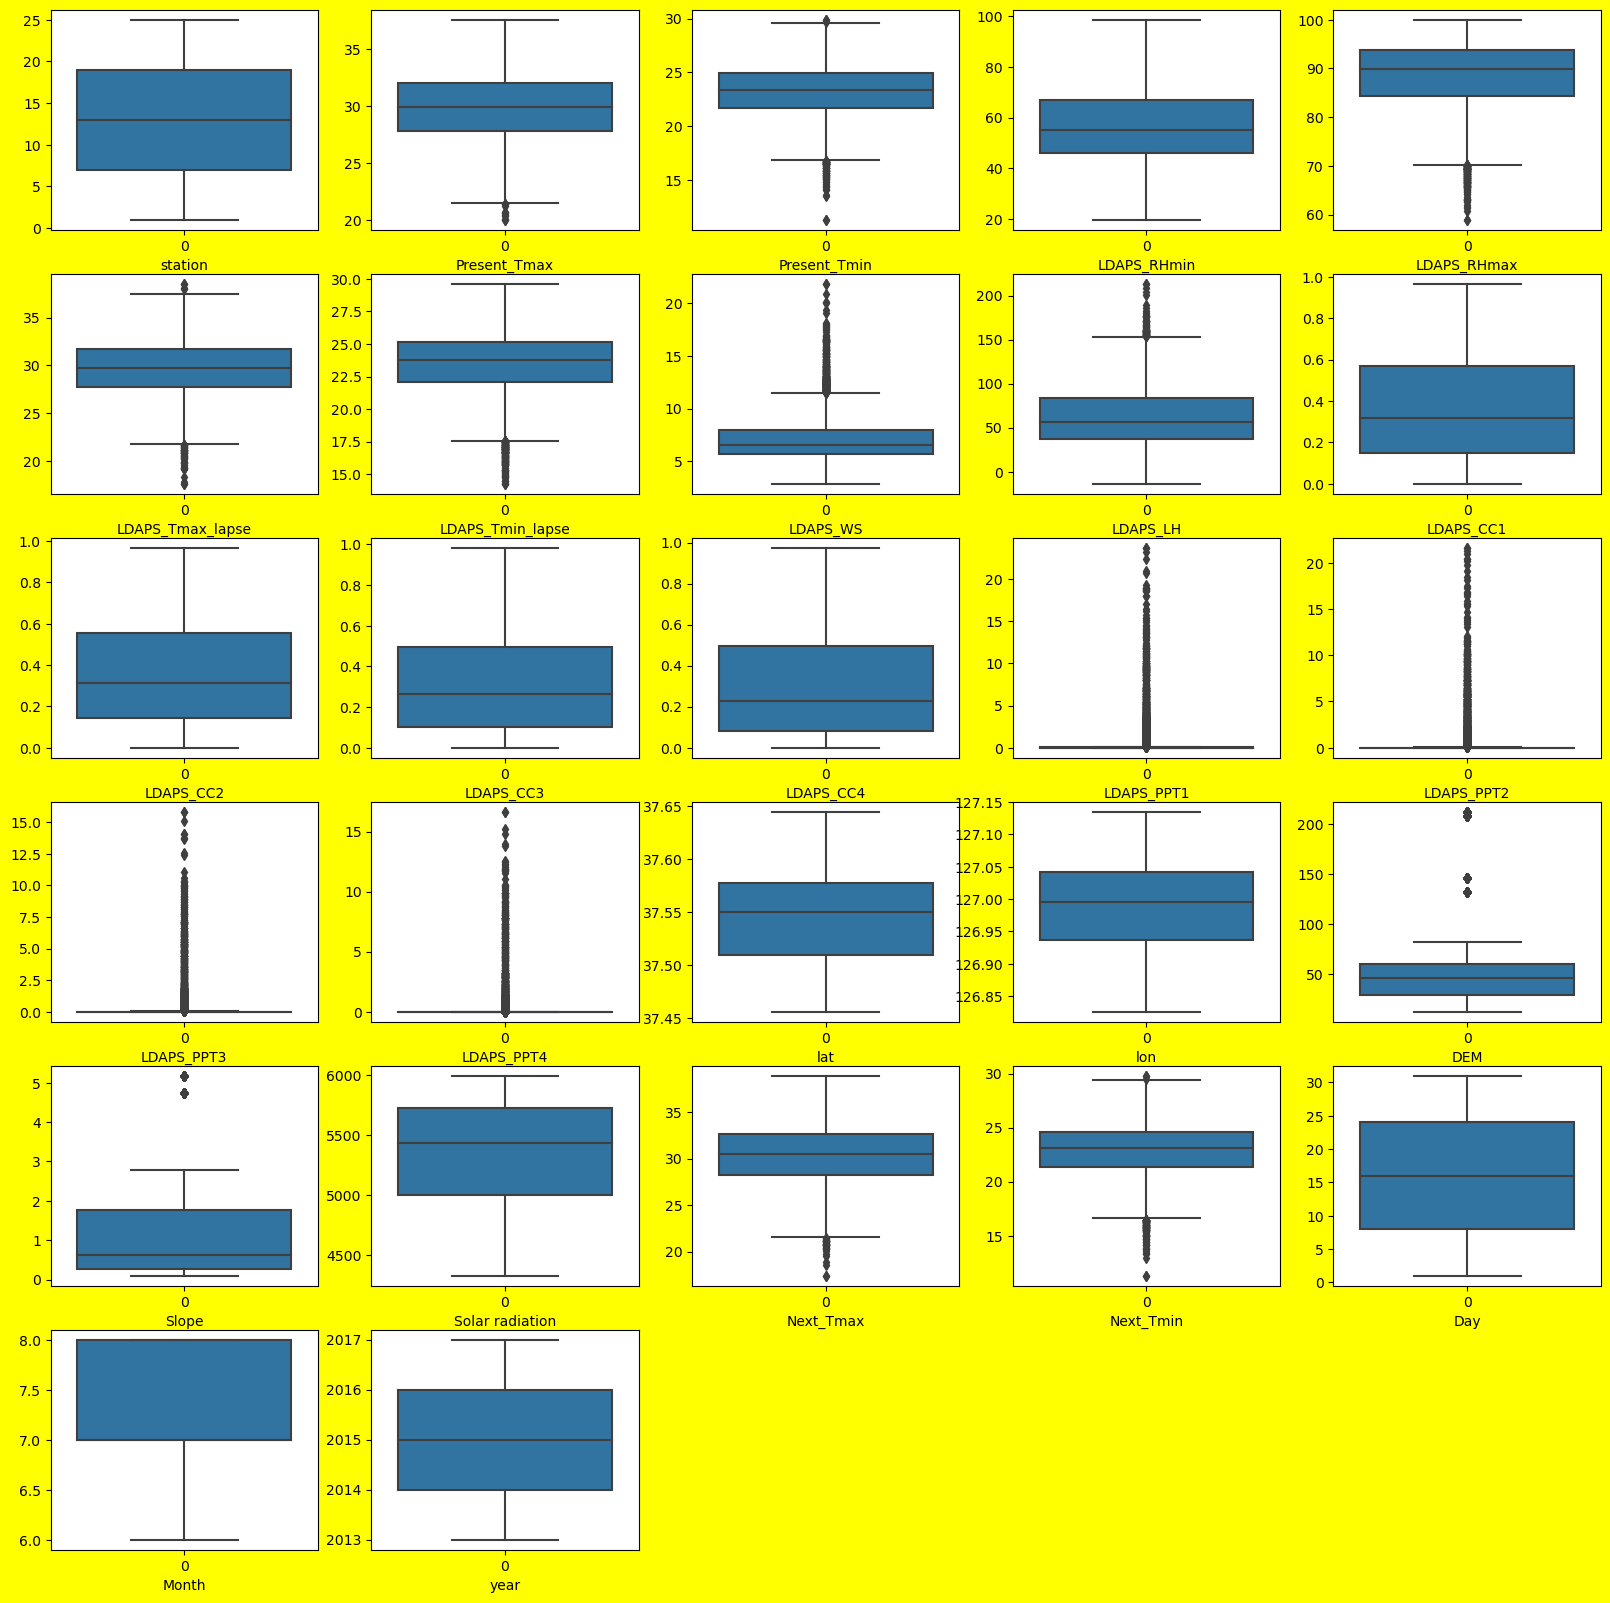

In [22]:
# Check the outliers

plt.figure(figsize=(20,20),facecolor='yellow')
number=1
for i in df:
    if number<=27:
        ax=plt.subplot(6,5,number)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()

In [23]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'year'],
      dtype='object')

In [24]:
# Find the standard number of outlier and remove it

from scipy.stats import zscore

z_score=zscore(df[['Present_Tmax','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH',
                   'LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope','Next_Tmax',
                   'Next_Tmin',]])
data=np.abs(z_score)
filter_data=(data<3).all(axis=1)
df=df[filter_data]
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30.0,8.0,2017.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30.0,8.0,2017.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30.0,8.0,2017.0


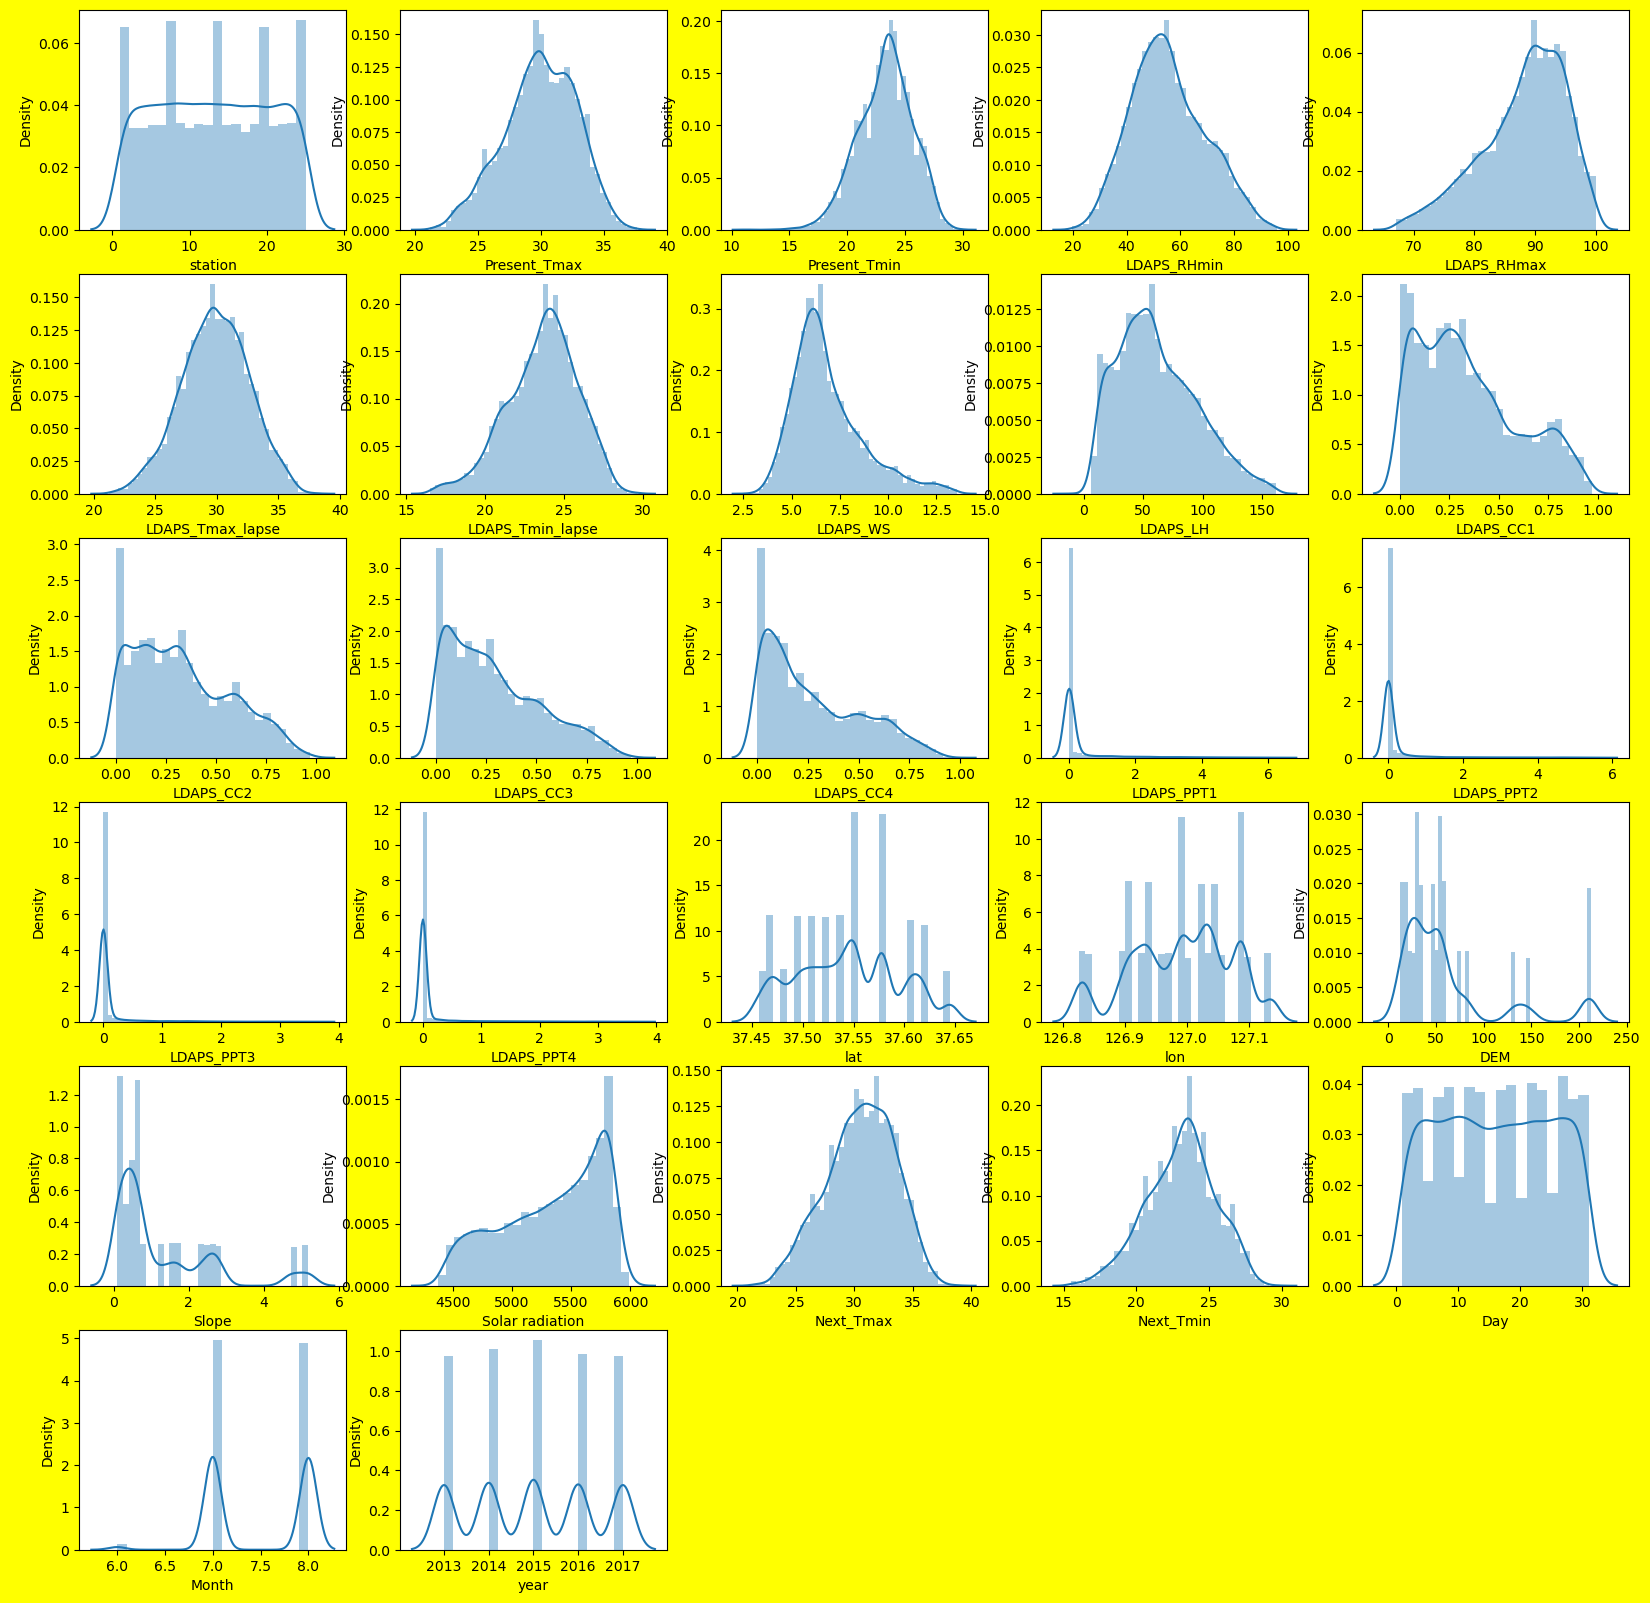

In [25]:
# Again check the distribution of data after remove the outliers

plt.figure(figsize=(20,20),facecolor='yellow')
number=1
for i in df:
    if number<=27:
        ax=plt.subplot(6,5,number)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()      

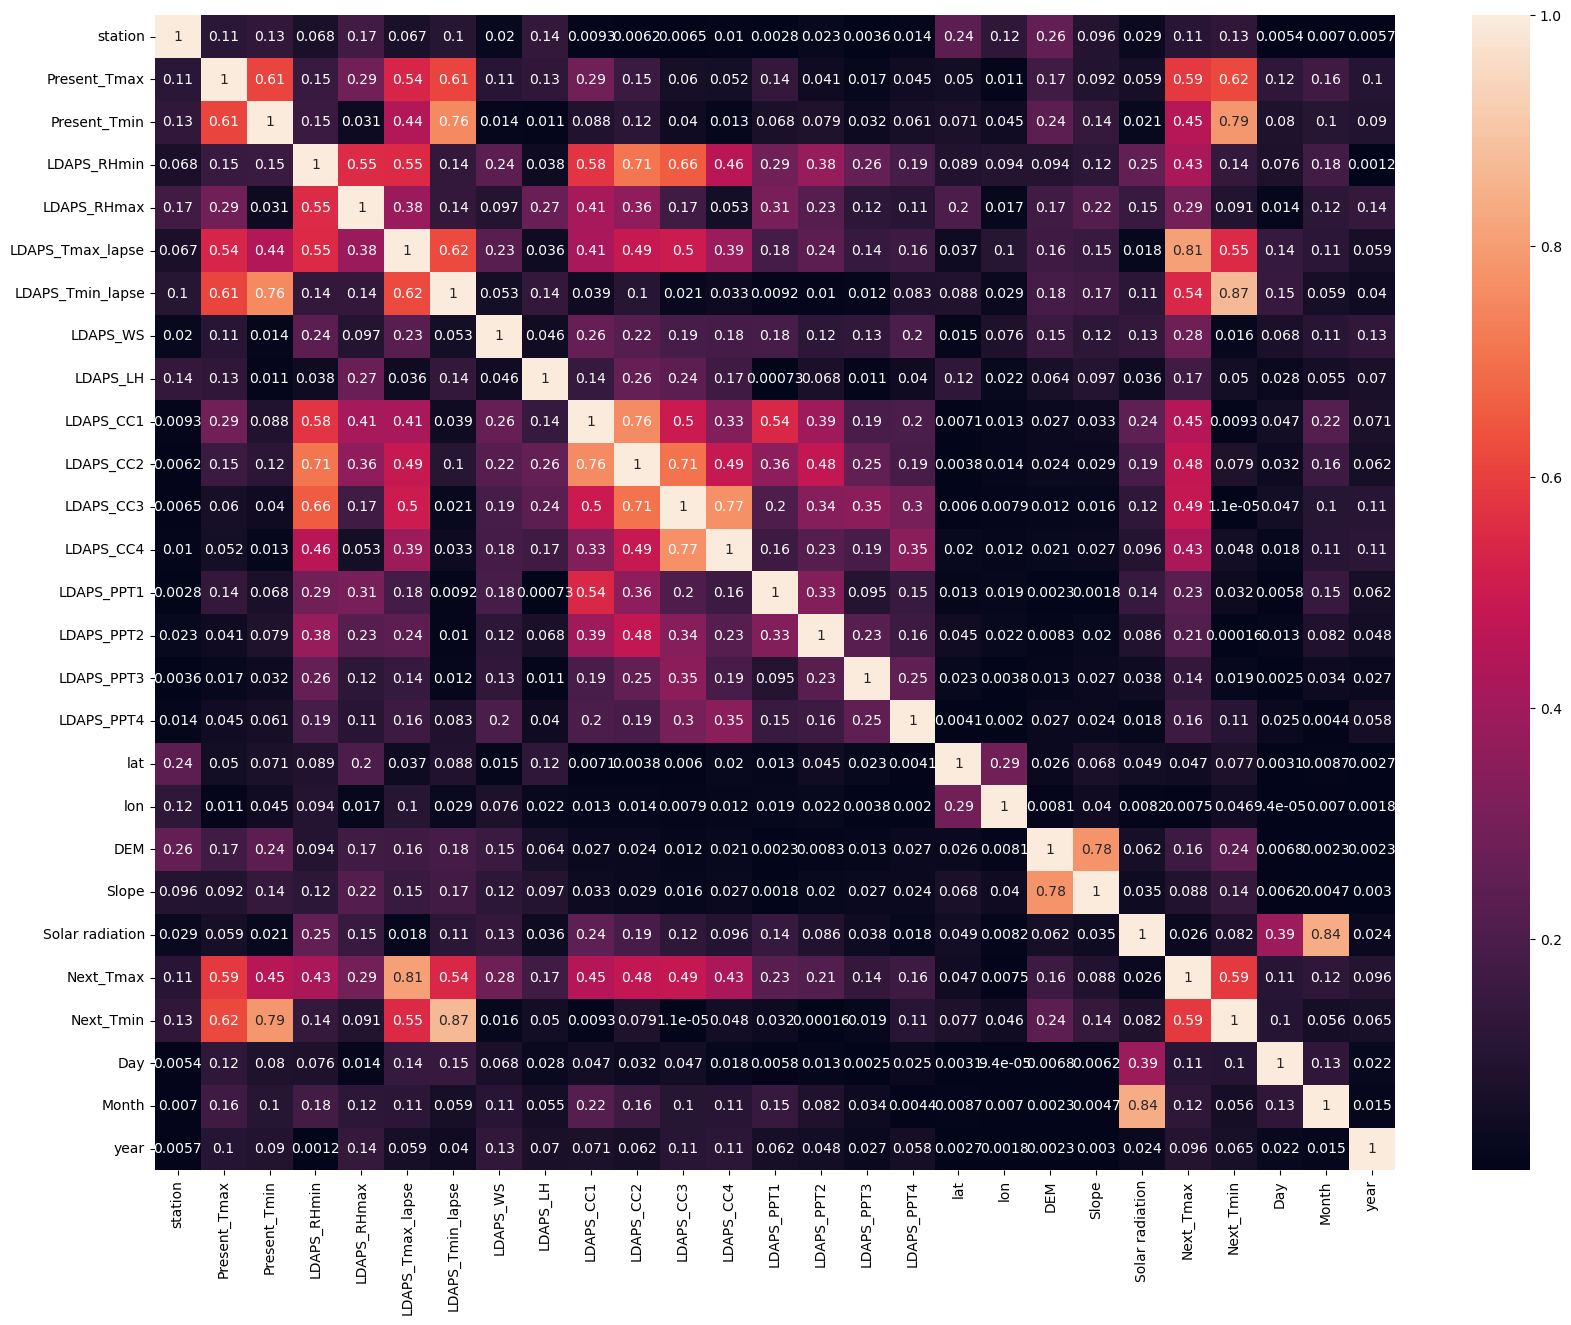

In [26]:
# Check the corelation and relationship b/w data (feature and Target)

plt.figure(figsize=(20,15))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()

# In this heapmap we can see some feature has a corelation but they have a strong relation with target so 
# before remove any feature we reconfirm or collect more proff.

In [27]:
# Separate Input and Output Variable

x=df.drop(['Present_Tmin'],axis=1)
y=df.Present_Tmin

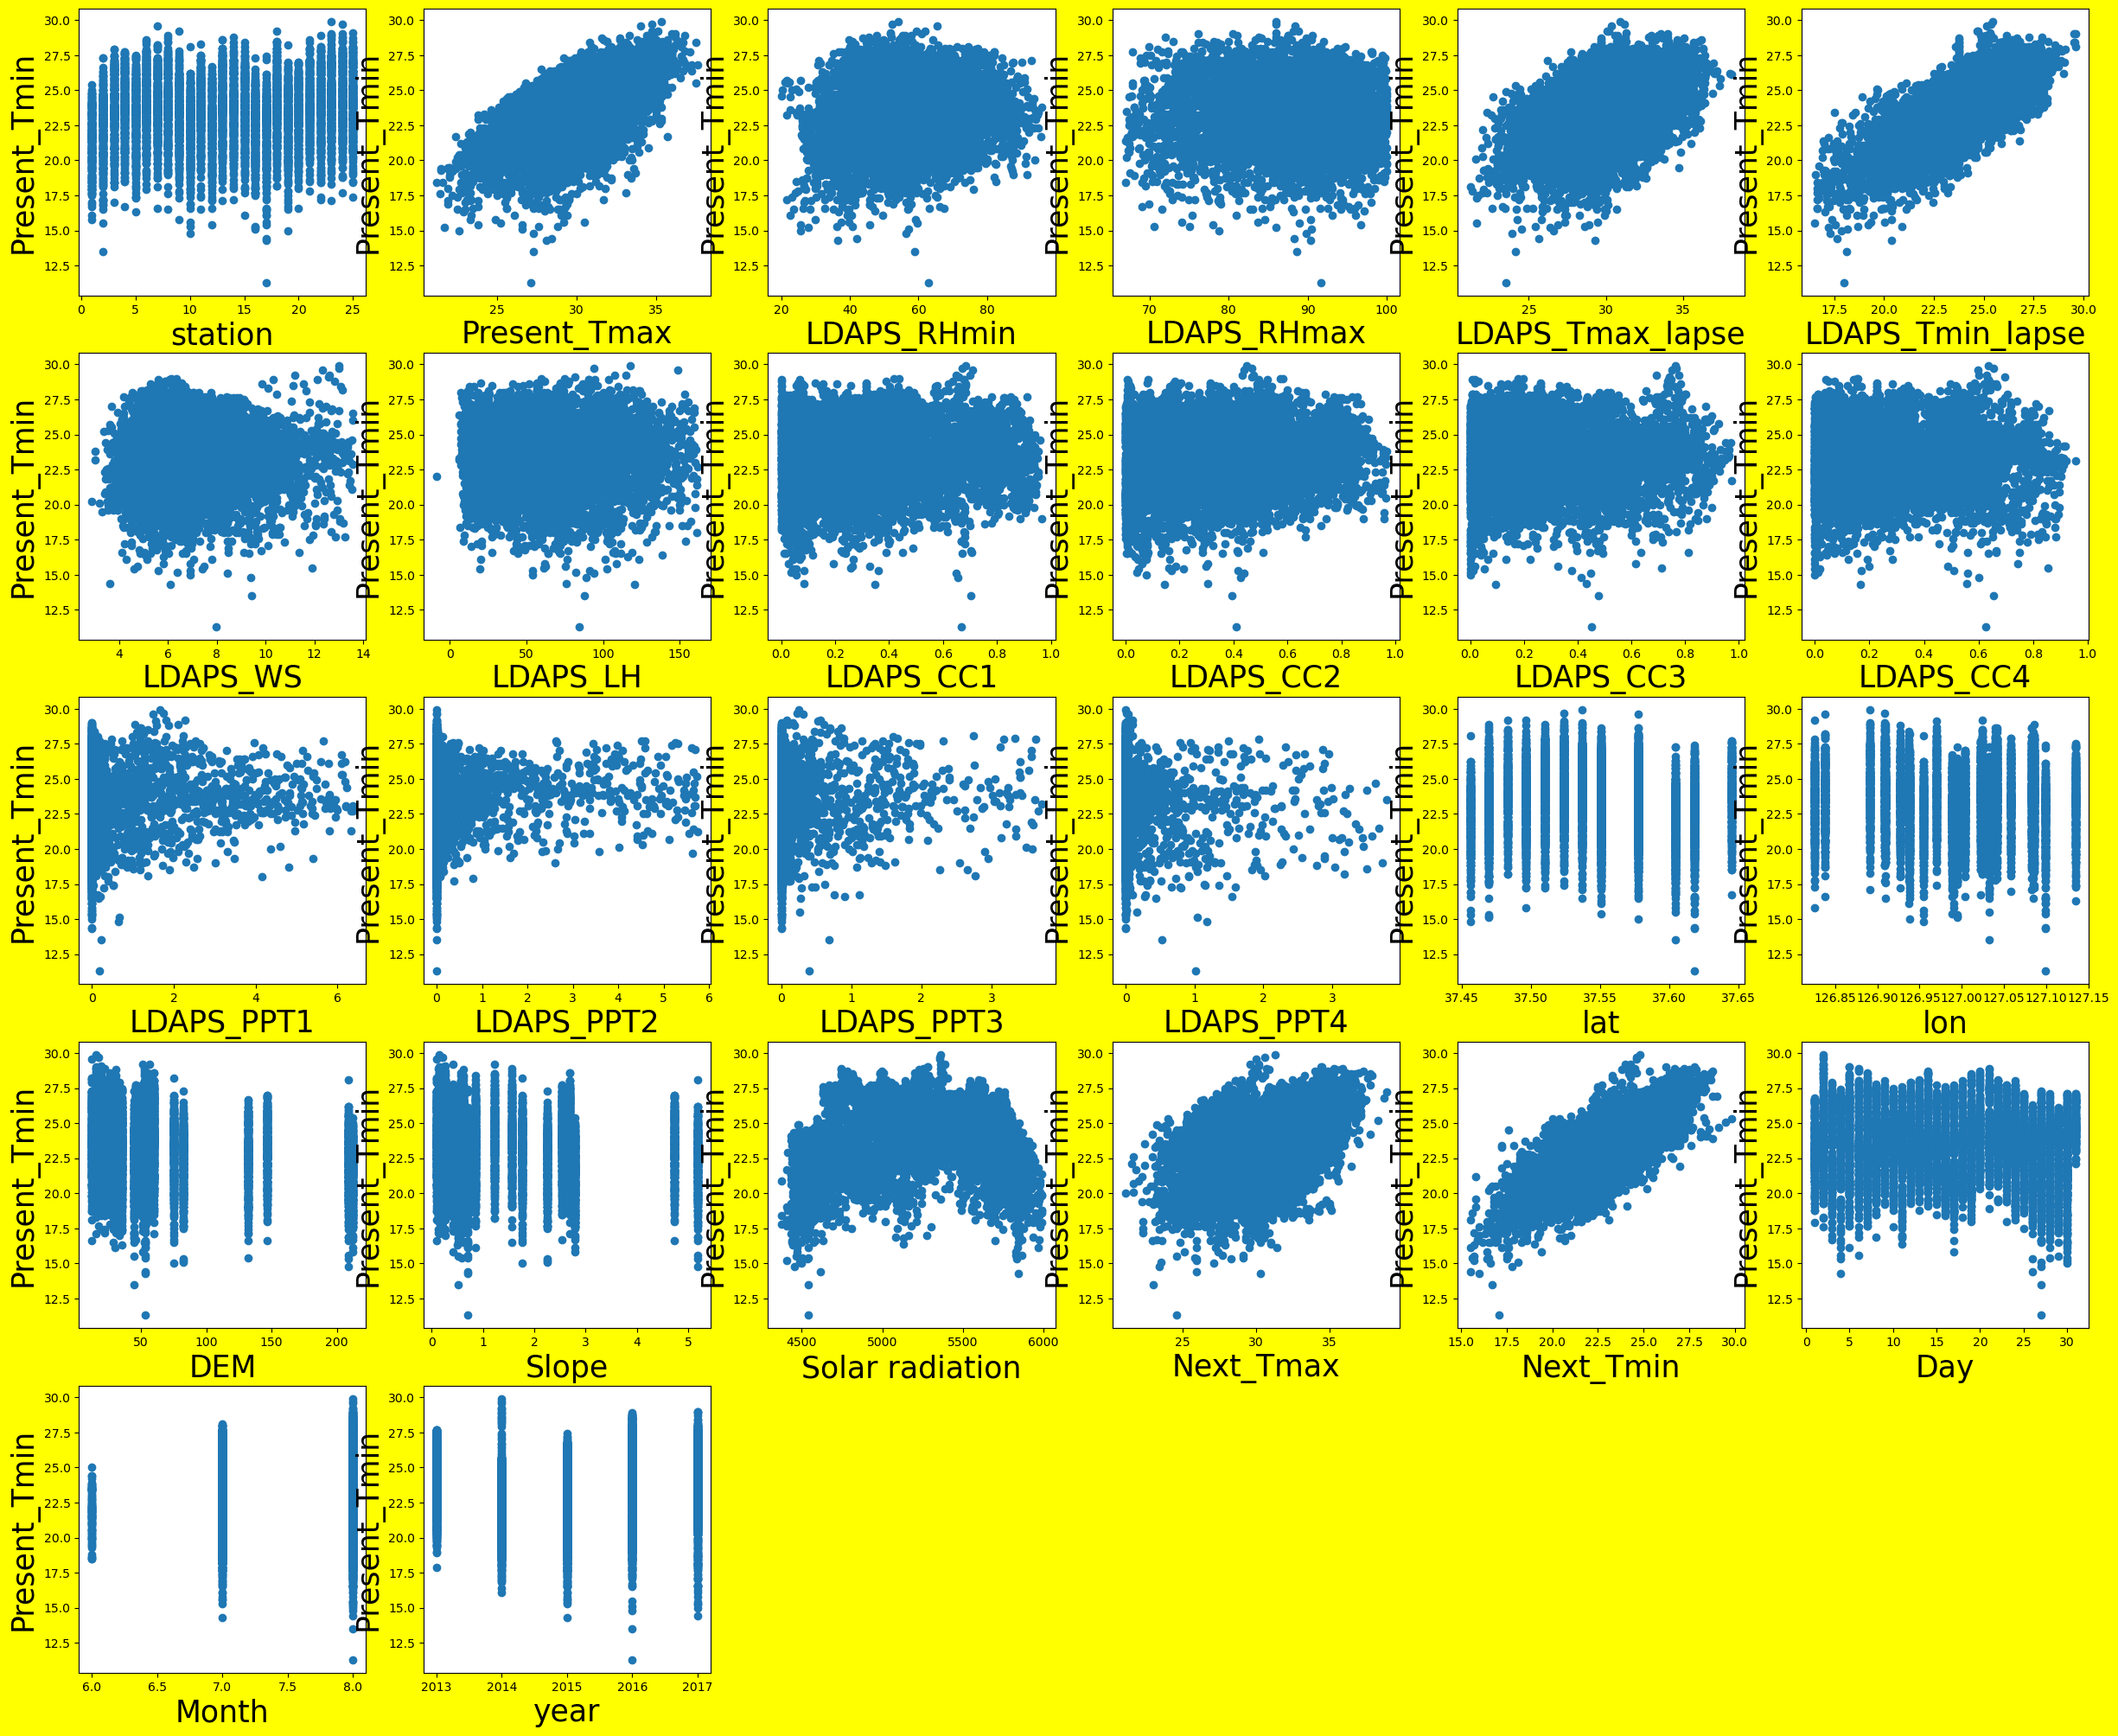

In [28]:
# Now we check the relation b/w Input and Output Variable

plt.figure(figsize=(30,25),facecolor='yellow')
number=1
for i in x:
    if number<=26:
        ax=plt.subplot(5,6,number)
        plt.scatter(x[i],y)
        plt.xlabel(i,fontsize=25)
        plt.ylabel('Present_Tmin',fontsize=25)
    number+=1
plt.show()

# After go through the graph we analyse every feature has a relation with target.

In [29]:
# Now standarised the data means take all data on one scale.

from sklearn.preprocessing import StandardScaler

x_scaler=StandardScaler()
x_scaler=x_scaler.fit_transform(x)
x_scaler

array([[-1.67239698, -0.43036096,  0.19464141, ...,  1.57741142,
        -2.80032648, -1.42540896],
       [-1.53342269,  0.68914955, -0.23854139, ...,  1.57741142,
        -2.80032648, -1.42540896],
       [-1.3944484 ,  0.58419544, -0.4968277 , ...,  1.57741142,
        -2.80032648, -1.42540896],
       ...,
       [ 1.38503733, -2.31953494, -2.08353359, ...,  1.57741142,
         0.99439044,  1.43223157],
       [ 1.52401161, -2.31953494, -2.27876551, ...,  1.57741142,
         0.99439044,  1.43223157],
       [ 1.6629859 , -2.35451964, -2.35883539, ...,  1.57741142,
         0.99439044,  1.43223157]])

In [30]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_scaler)

array([[ 0.83206345,  2.45088168, -3.45524112, ...,  0.28648869,
         0.22183293,  0.31822107],
       [-0.44057526,  0.41022314, -1.71921804, ..., -0.09838882,
         0.25505925,  0.34332077],
       [-0.81908853, -0.26600601, -1.04770404, ...,  0.19308539,
         0.27640558,  0.32613297],
       ...,
       [-1.43679253,  4.43287   ,  3.60465757, ...,  0.32036272,
         0.55290386,  0.02762754],
       [-1.63785347,  4.16505586,  3.80608103, ...,  0.46331492,
         0.39022712,  0.04122009],
       [-1.46597088,  4.3799044 ,  4.02584826, ...,  0.02787477,
         0.23010246,  0.01308763]])

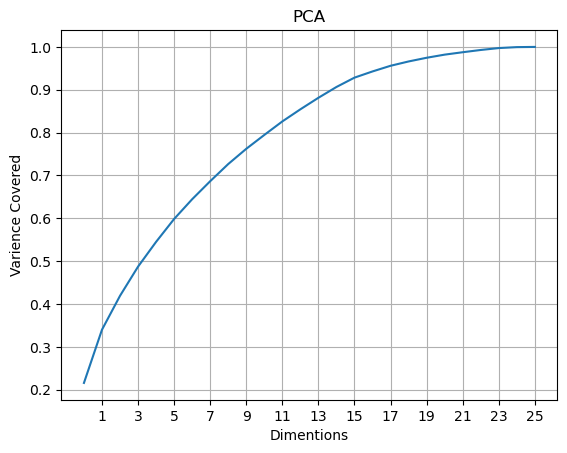

In [31]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,26,2))
plt.xlabel('Dimentions')
plt.ylabel('Varience Covered')
plt.title('PCA')
plt.show()

In [32]:
pca=PCA(n_components=19) # here we select required dimensions number
new_comp=pca.fit_transform(x_scaler)
princi_comp=pd.DataFrame(new_comp)
princi_comp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.832063,2.450882,-3.455241,-0.870775,0.596425,-0.189152,-1.214161,-0.592394,1.452709,-2.079625,-0.035786,0.817407,-0.784947,0.016021,0.490824,-0.513808,-0.447616,0.356619,-0.470713
1,-0.440575,0.410223,-1.719218,-1.963825,-1.375957,-0.809387,-1.183409,-0.525777,1.215131,-2.239645,0.044323,0.794595,-0.921352,0.007917,0.293929,-0.386836,-0.160943,1.020996,0.246977
2,-0.819089,-0.266006,-1.047704,-2.406313,-0.781285,-0.794649,-1.815259,0.020922,1.539271,-2.096523,-0.048311,1.006993,-0.783746,-0.157300,0.104625,-0.185278,-0.058345,1.024782,-0.071664
3,-0.264079,0.462405,-2.812524,-1.038111,-1.391706,-0.656786,-1.059438,-0.947225,1.265207,-2.440533,0.265877,-0.120046,-0.823033,0.111776,0.911801,-0.580112,0.080801,0.909106,0.442704
4,-0.485631,0.597456,-1.770158,-1.745872,-1.670773,-1.089327,-0.353362,-0.690300,1.483474,-1.959449,0.155582,-0.069323,-1.773916,-0.122784,-1.329764,0.150038,-0.109280,0.673743,-0.450083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6906,-1.389772,4.629162,3.547894,-1.114285,-0.262166,-0.204065,-0.724371,0.314702,1.274175,1.390147,0.190500,-0.272443,1.825230,0.043240,0.531416,0.727023,0.470296,-0.008761,-0.079873
6907,-1.137788,5.037430,3.207029,-0.781936,-1.139039,-0.259783,0.590512,-0.557794,1.047592,1.562975,0.355448,-0.854291,0.901982,-0.173561,-0.726932,1.097932,0.370452,-0.424185,-0.446563
6908,-1.436793,4.432870,3.604658,-0.973936,-0.303664,0.490868,1.033214,-1.054170,0.625421,0.919408,0.185609,-0.151352,1.618472,0.683446,0.530831,0.261364,-0.181655,-0.395756,-0.461862
6909,-1.637853,4.165056,3.806081,-1.163038,0.073514,0.612857,0.608611,-0.650428,0.890824,1.065336,0.166178,-0.108898,1.743494,0.502154,0.554019,0.427299,0.018365,-0.351500,-0.318600


In [33]:
# Split the dataset into Training and Test Data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=.25,random_state=20)

In [34]:
# As it is Regression Problem so we use Regression Models
# Linear Regression Model

from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [35]:
# Now we check how much linear Regression model understand the trained data

lin_reg.score(x_train,y_train)

0.7104797744139353

In [36]:
# Now we check how much linear Regression model understand the test Data

lin_reg.score(x_test,y_test)

0.700514015404363

In [37]:
# Now we evaluate the model using metrics that how model is performing.

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [38]:
y_pred=lin_reg.predict(x_test)
y_pred

array([25.85073281, 23.26258614, 25.03562011, ..., 26.42338307,
       22.54397849, 25.98849693])

In [39]:
r1=r2_score(y_test,y_pred)
r1

0.700514015404363

In [40]:
mae1=mean_absolute_error(y_test,y_pred)
mae1

1.0073976852284692

In [41]:
mse1=mean_squared_error(y_test,y_pred)
mse1

1.6882125993111938

In [42]:
rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
rmse1

1.2993123563297602

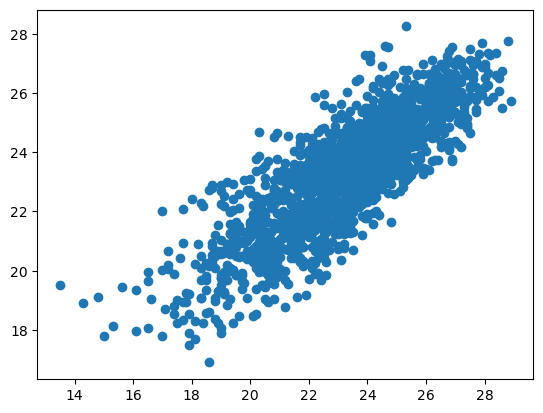

In [43]:
# RMSE is low now we check the relation using graph

plt.scatter(x=y_test,y=y_pred)

In [44]:
# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor

dec_tree=DecisionTreeRegressor()
dec_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [45]:
dec_tree.score(x_train,y_train)

1.0

In [46]:
dec_tree.score(x_test,y_test)

0.6941512254220584

In [47]:
pred1=dec_tree.predict(x_test)
pred1

array([26.8, 25.1, 25.4, ..., 26.4, 21.1, 27. ])

In [48]:
r2=r2_score(y_test,pred1)
r2

0.6941512254220584

In [49]:
mae2=mean_absolute_error(y_test,pred1)
mae2

0.8957754629629628

In [50]:
mse2=mean_squared_error(y_test,pred1)
mse2

1.7240798611111112

In [51]:
rmse2=np.sqrt(mean_squared_error(y_test,pred1))
rmse2

1.3130422160429995

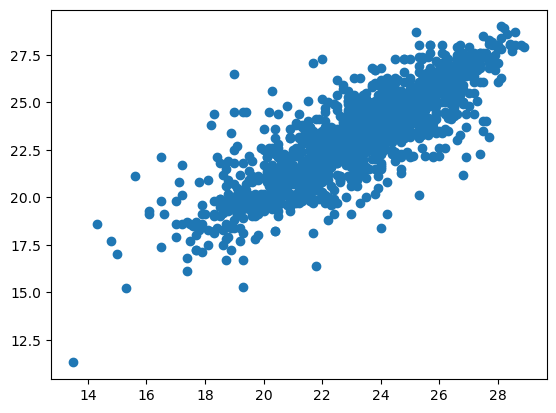

In [52]:
# RMSE score is batter than above model now we check the relation using graph.
# We use other model also, may be that model will perform batter than past model 

plt.scatter(x=y_test,y=pred1)

In [53]:
# AdaBoost Regressor Model

from sklearn.ensemble import AdaBoostRegressor

In [54]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [55]:
pred2=ada.predict(x_test)
pred2

array([26.31974406, 23.25347913, 24.40331754, ..., 26.07789661,
       22.14899206, 25.73603604])

In [56]:
r3=r2_score(y_test,pred2)
r3

0.6927949665957065

In [57]:
mae3=mean_absolute_error(y_test,pred2)
mae3

1.0593079743531735

In [58]:
mse3=mean_squared_error(y_test,pred2)
mse3

1.7317251378731133

In [59]:
rmse3=np.sqrt(mean_squared_error(y_test,pred2))
rmse3

1.3159502794076656

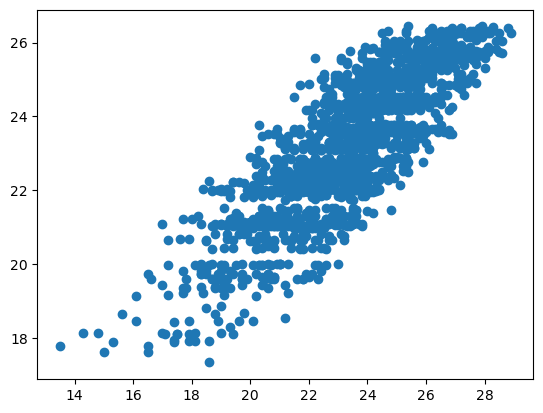

In [60]:
# RMSE score is good but not batter than above model now we check the relation using graph.
# We use other model also, may be that model will perform batter than past model 

plt.scatter(x=y_test,y=pred2)

In [61]:
# Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
ran_forst=RandomForestRegressor()
ran_forst.fit(x_train,y_train)

RandomForestRegressor()

In [62]:
pred3=ran_forst.predict(x_test)
pred3

array([26.807, 23.684, 24.777, ..., 26.767, 22.218, 27.08 ])

In [63]:
r4=r2_score(y_test,pred3)
r4

0.8615242786687266

In [64]:
mae4=mean_absolute_error(y_test,pred3)
mae4

0.6467679398148152

In [65]:
mse4=mean_squared_error(y_test,pred3)
mse4

0.7805923130787046

In [66]:
rmse4=np.sqrt(mean_squared_error(y_test,pred3))
rmse4

0.8835113542443609

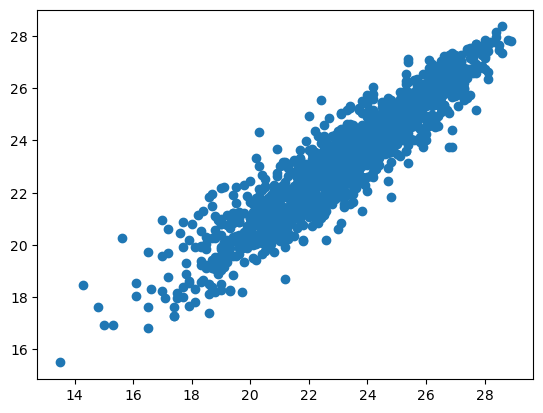

In [67]:
# RMSE score is good and this model is batter than all above model now we check the relation using graph.
# We use other model also, may be that model will perform batter than past model 

plt.scatter(x=y_test,y=pred3)

In [68]:
# KNN Regressor Model

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [69]:
pred4=knn.predict(x_test)
pred4

array([27.  , 24.18, 25.54, ..., 27.1 , 23.06, 26.48])

In [70]:
r5=r2_score(y_test,pred4)
r5

0.7737418189754428

In [71]:
mae5=mean_absolute_error(y_test,pred4)
mae5

0.8480787037037039

In [72]:
mse5=mean_squared_error(y_test,pred4)
mse5

1.275425

In [73]:
rmse5=np.sqrt(mean_squared_error(y_test,pred4))
rmse5

1.1293471565466484

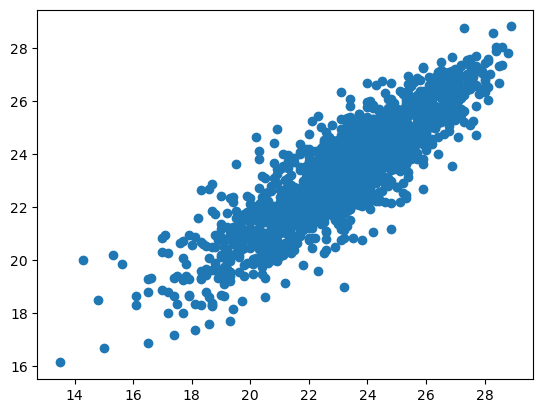

In [74]:
# RMSE score is good but not batter than above model now we check the relation using graph.
# We use other model also, may be that model will perform batter than past model 

plt.scatter(x=y_test,y=pred4)

In [75]:
# Gradient Boosting Regressor Model

from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

GradientBoostingRegressor()

In [76]:
pred5=gbdt.predict(x_test)
pred5

array([26.13144959, 23.07146201, 25.00961313, ..., 26.5192525 ,
       22.25858939, 26.67952846])

In [77]:
r6=r2_score(y_test,pred5)
r6

0.7991902261036408

In [78]:
mae6=mean_absolute_error(y_test,pred5)
mae6

0.82392172609798

In [79]:
mse6=mean_squared_error(y_test,pred5)
mse6

1.1319714704325583

In [80]:
rmse6=np.sqrt(mean_squared_error(y_test,pred5))
rmse6

1.063941478857065

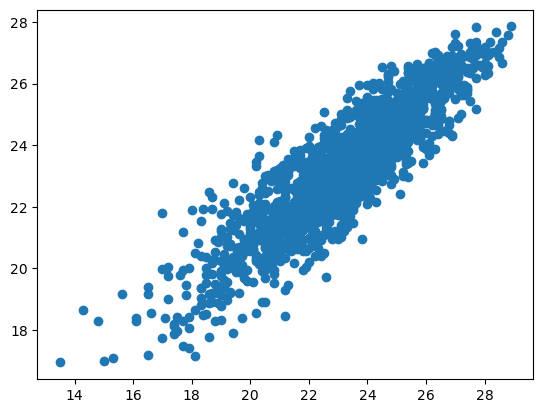

In [81]:
# RMSE score is good now we check the relation using graph.
# We use other model also, may be that model will perform batter than past model 

plt.scatter(x=y_test,y=pred5)

In [82]:
# SVR Model
from sklearn.svm import SVR
svr=SVR()  
svr.fit(x_train,y_train)

SVR()

In [83]:
pred6=svr.predict(x_test)
pred6

array([26.8095611 , 23.13929812, 25.50605794, ..., 25.74767218,
       23.40882946, 26.44552051])

In [84]:
r7=r2_score(y_test,pred6)
r7

0.809108153797977

In [85]:
mae7=mean_absolute_error(y_test,pred6)
mae7

0.7515050873934569

In [86]:
mse7=mean_squared_error(y_test,pred6)
mse7

1.0760637774056454

In [87]:
rmse7=np.sqrt(mean_squared_error(y_test,pred6))
rmse7

1.0373349398365244

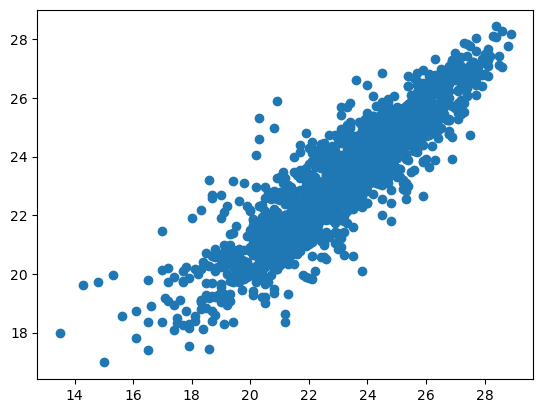

In [88]:
# RMSE score is good now we check the relation using graph.
# We use other model also, may be that model will perform batter than past model 

plt.scatter(x=y_test,y=pred6)

In [89]:
# Cross_Validation:

from sklearn.model_selection import cross_val_score


In [90]:
lnr_reg=cross_val_score(lin_reg,x_scaler,y,cv=5).mean()
lnr_reg

0.5868738579652129

In [91]:
dec_tr=cross_val_score(dec_tree,x_scaler,y,cv=5).mean()
dec_tr

0.19845905058705665

In [92]:
ada_reg=cross_val_score(ada,x_scaler,y,cv=5).mean()
ada_reg

0.5415342699990787

In [93]:
ran_reg=cross_val_score(ran_forst,x_scaler,y,cv=5).mean()
ran_reg

0.5510131878637756

In [94]:
knn_reg=cross_val_score(knn,x_scaler,y,cv=5).mean()
knn_reg

0.3548485523334335

In [95]:
gbdt_reg=cross_val_score(gbdt,x_scaler,y,cv=5).mean()
gbdt_reg

0.583724727436938

In [96]:
svr_reg=cross_val_score(svr,x_scaler,y,cv=5).mean()
svr_reg

0.5281792790226445

In [97]:
models = pd.DataFrame({'Model': ['Linear_Regression','Decision Tree','AdaBoost','Random_Forest','KNN_Model','GBDT','Support Vector Machines'],
                       'R2 Score Result':[r1,r2,r3,r4,r5,r6,r7],'MAE Result':[mae1,mae2,mae3,mae4,mae5,mae6,mae7],
                       'MSE Result':[mse1,mse2,mse3,mse4,mse5,mse6,mse7],'RMSE Result':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7],
                       'Cross Validation Score':[lnr_reg,dec_tr,ada_reg,ran_reg,knn_reg,gbdt_reg,svr_reg]})
models

,Model,R2 Score Result,MAE Result,MSE Result,RMSE Result,Cross Validation Score
0,Linear_Regression,0.700514,1.007398,1.688213,1.299312,0.586874
1,Decision Tree,0.694151,0.895775,1.724080,1.313042,0.198459
2,AdaBoost,0.692795,1.059308,1.731725,1.315950,0.541534
3,Random_Forest,0.861524,0.646768,0.780592,0.883511,0.551013
4,KNN_Model,0.773742,0.848079,1.275425,1.129347,0.354849
5,GBDT,0.799190,0.823922,1.131971,1.063941,0.583725
6,Support Vector Machines,0.809108,0.751505,1.076064,1.037335,0.528179


In [98]:
# In above DataFrame we can see Random Forest model performing better than other models so we use hyperparameter tunning
# for Random Forest model.


In [99]:
params={'n_estimators':[4,5],'max_depth':[10,15],'min_samples_leaf':[5,6],
        'min_samples_split':[10,11]}

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
grid_search = GridSearchCV(ran_forst,params,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [4, 5]})

In [102]:
grid_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 5}

In [103]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=11,
                      n_estimators=5)

In [104]:
# Final Model

final_model=RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10,n_estimators=5)
final_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=5)

In [105]:
predd=final_model.predict(x_test)
predd

array([26.8810928 , 24.60554545, 24.76959402, ..., 26.49188456,
       22.30150183, 27.07626129])

In [106]:
r2_score(y_test,predd)

0.8225796269202272

In [107]:
mean_absolute_error(y_test,predd)

0.753632384058768

In [108]:
mean_squared_error(y_test,predd)

1.0001246289110266

In [109]:
np.sqrt(mean_squared_error(y_test,predd))

1.0000623125140886

In [110]:
# Prediction 2 : Present_Tmax 

In [111]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30.0,8.0,2017.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30.0,8.0,2017.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30.0,8.0,2017.0


In [112]:
# Separate Input and Output Variable

x=df.drop(['Present_Tmax'],axis=1)
y=df.Present_Tmax

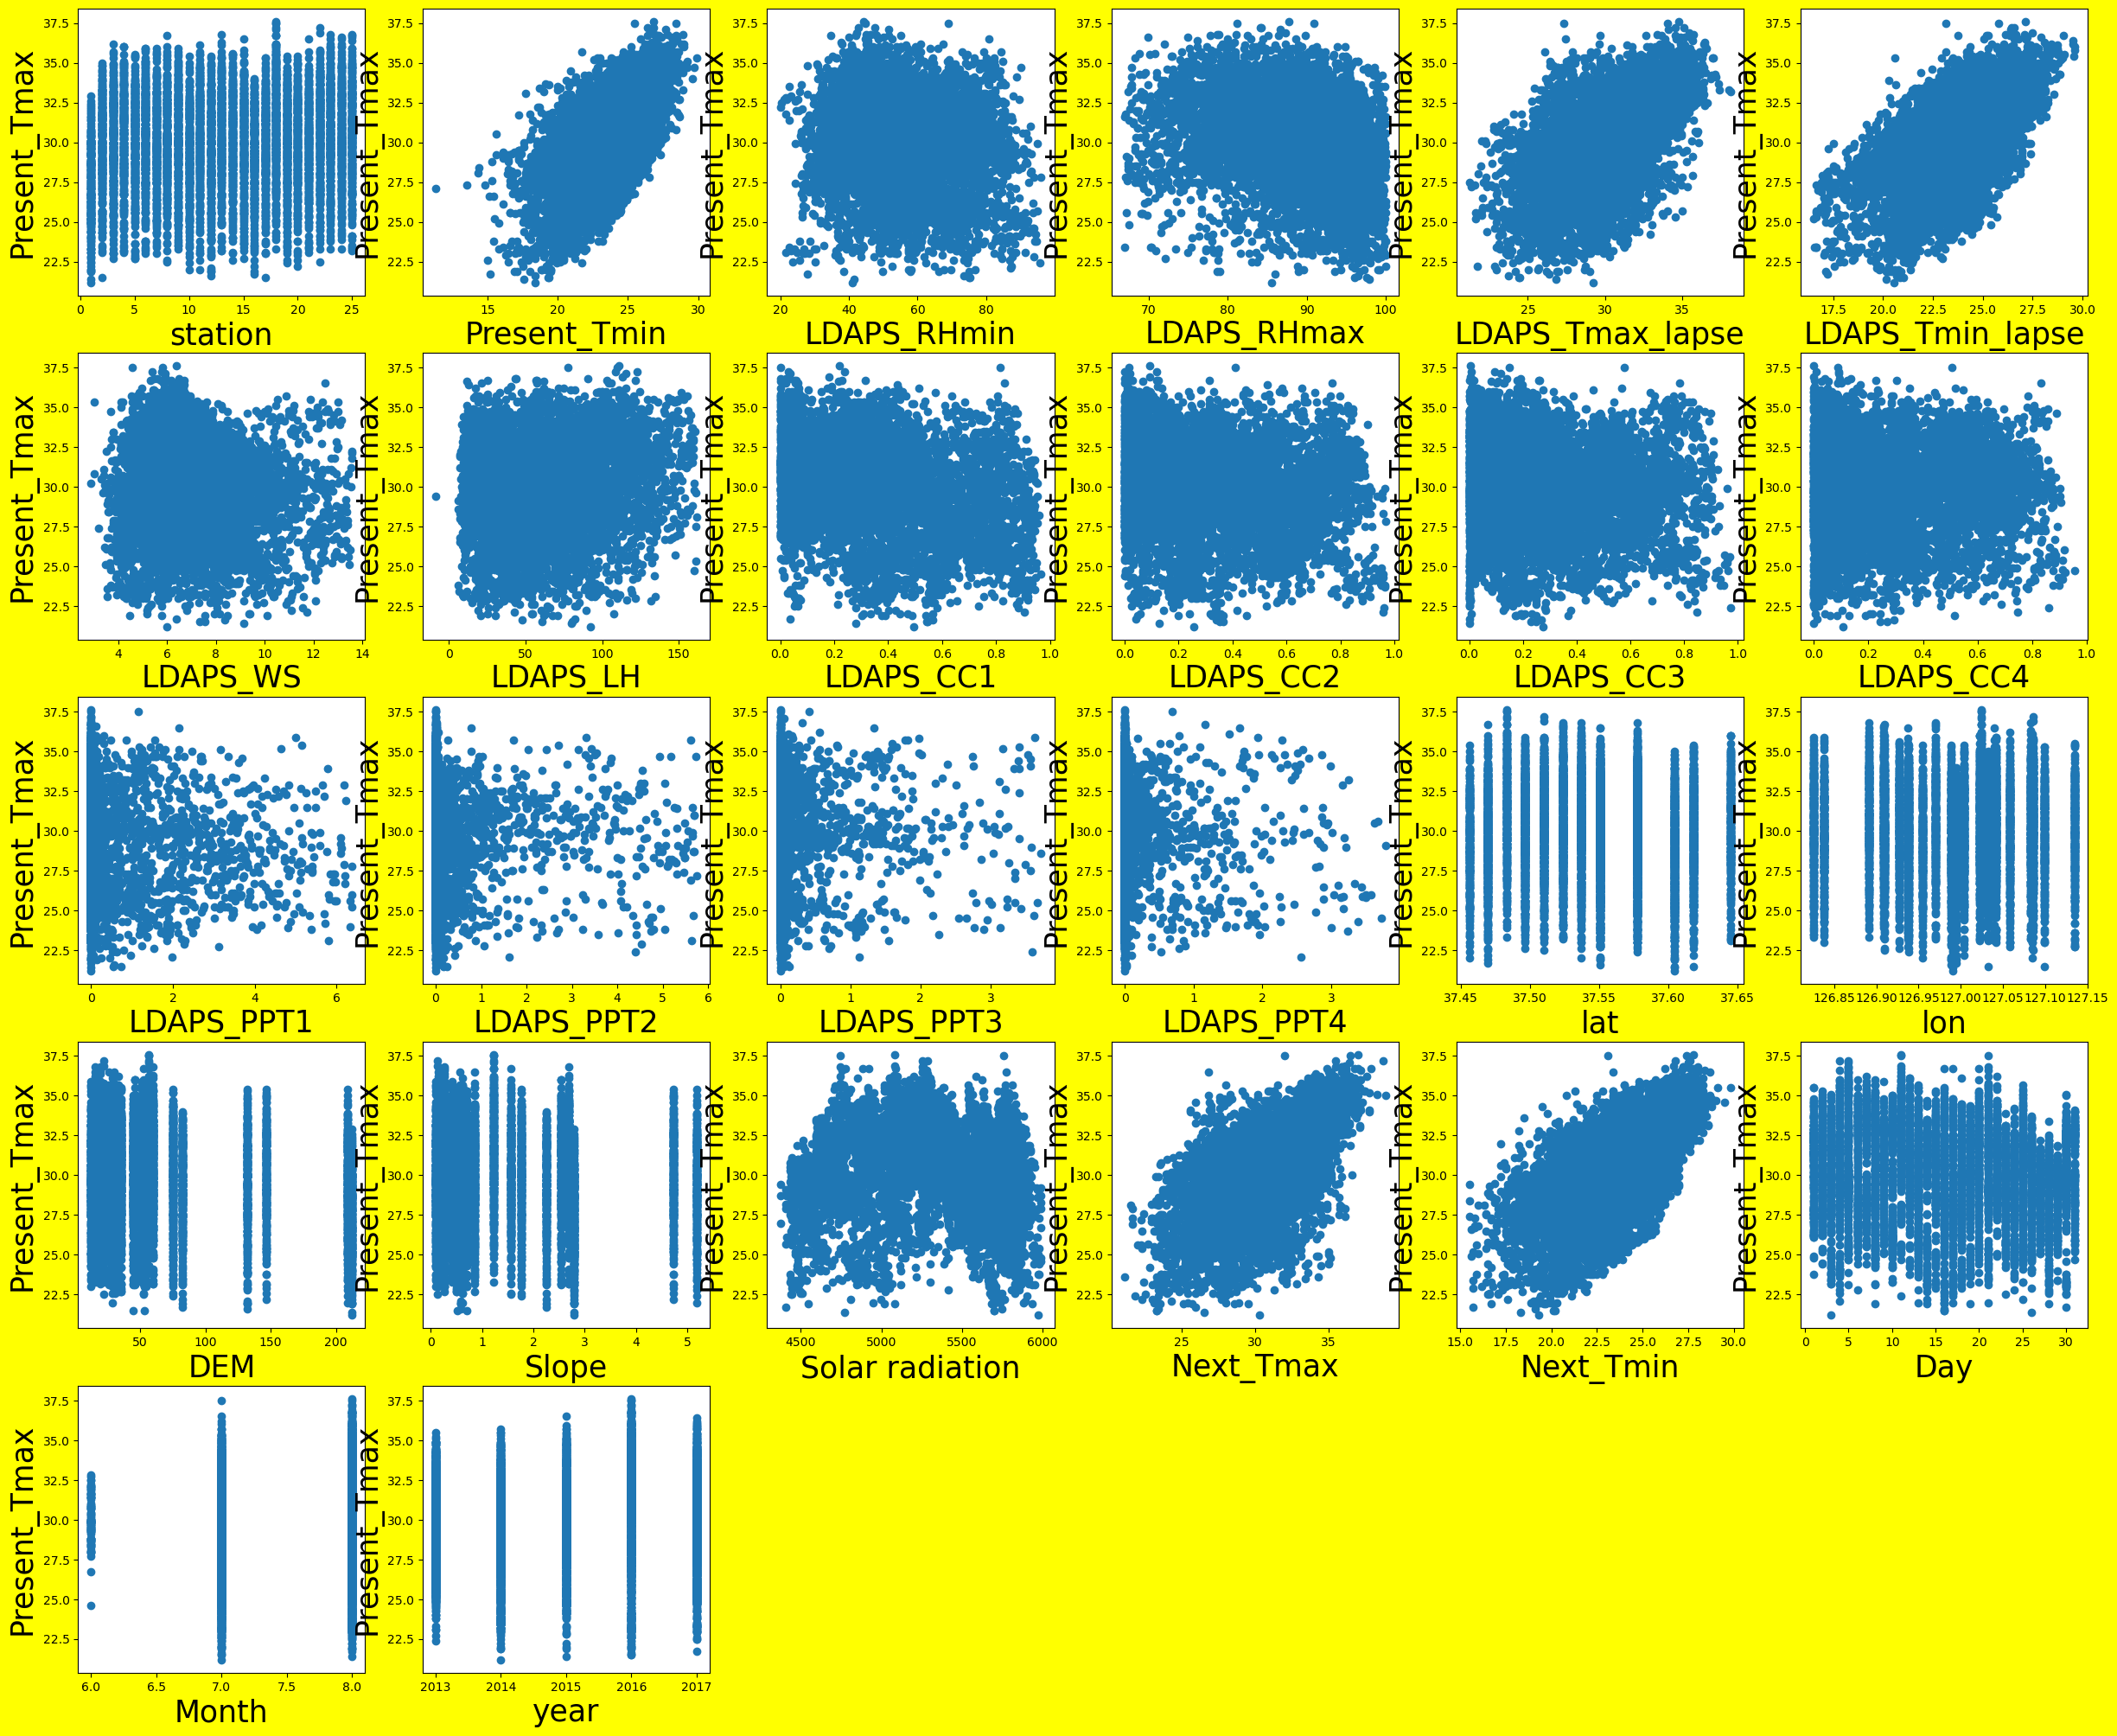

In [113]:
# Now we check the relation b/w Input and Output Variable

plt.figure(figsize=(30,25),facecolor='yellow')
number=1
for i in x:
    if number<=26:
        ax=plt.subplot(5,6,number)
        plt.scatter(x[i],y)
        plt.xlabel(i,fontsize=25)
        plt.ylabel('Present_Tmax',fontsize=25)
    number+=1
plt.show()

# After go through the graph we analyse every feature has a relation with target.

In [114]:
# Now standarised the data means take all data on one scale.

from sklearn.preprocessing import StandardScaler

x_scaler=StandardScaler()
x_scaler=x_scaler.fit_transform(x)
x_scaler

array([[-1.67239698, -0.80789196,  0.19464141, ...,  1.57741142,
        -2.80032648, -1.42540896],
       [-1.53342269, -0.72248581, -0.23854139, ...,  1.57741142,
        -2.80032648, -1.42540896],
       [-1.3944484 ,  0.00346642, -0.4968277 , ...,  1.57741142,
        -2.80032648, -1.42540896],
       ...,
       [ 1.38503733, -2.64412407, -2.08353359, ...,  1.57741142,
         0.99439044,  1.43223157],
       [ 1.52401161, -2.38790564, -2.27876551, ...,  1.57741142,
         0.99439044,  1.43223157],
       [ 1.6629859 , -2.51601485, -2.35883539, ...,  1.57741142,
         0.99439044,  1.43223157]])

In [115]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_scaler)

array([[ 0.75099372,  2.52293308, -3.49924635, ...,  0.28236971,
         0.25552207,  0.32665971],
       [-0.28273951,  0.86949639, -1.61816744, ...,  0.04345244,
         0.39852214,  0.34908705],
       [-0.73018252, -0.10906728, -0.93960514, ...,  0.24563026,
         0.35007454,  0.33467864],
       ...,
       [-1.83623445,  4.61740345,  3.49635091, ...,  0.30822598,
         0.45542192, -0.02394784],
       [-2.05672177,  4.24654757,  3.7031642 , ...,  0.43317737,
         0.28331518, -0.0049773 ],
       [-1.89026452,  4.51917859,  3.93297472, ...,  0.0190692 ,
         0.16728113, -0.01909258]])

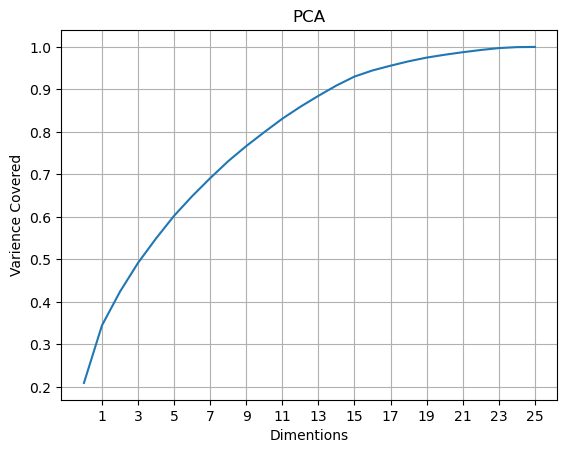

In [116]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,26,2))
plt.xlabel('Dimentions')
plt.ylabel('Varience Covered')
plt.title('PCA')
plt.show()

In [117]:
pca=PCA(n_components=19) # here we select required dimensions number
new_comp=pca.fit_transform(x_scaler)
princi_comp=pd.DataFrame(new_comp)
princi_comp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.750994,2.522933,-3.499246,-1.066213,0.403264,0.116552,-1.362911,-0.673044,1.336659,-1.994544,0.306179,0.888728,0.679398,0.400615,-0.388248,-0.334982,0.325676,-0.476014,-0.331297
1,-0.282740,0.869496,-1.618167,-2.192571,-1.705588,-0.272126,-1.369837,-0.554096,1.046364,-2.069210,0.496069,0.911527,0.763564,0.193692,-0.442144,-0.017698,-0.105598,-0.151302,-0.217884
2,-0.730183,-0.109067,-0.939605,-2.517918,-1.100198,-0.307424,-1.976660,-0.053508,1.415576,-2.004844,0.313762,1.074090,0.669309,-0.033806,-0.263197,0.118643,-0.236709,-0.664385,-0.085950
3,-0.156116,0.547972,-2.791283,-1.173365,-1.620642,-0.206730,-1.240894,-1.008647,1.106204,-2.300733,0.508224,-0.051705,0.743320,0.743480,-0.724302,-0.236603,-0.348940,-0.429401,0.364273
4,-0.368303,0.957629,-1.691114,-1.961510,-2.018800,-0.502699,-0.556231,-0.774495,1.323646,-1.788835,0.452891,0.074242,1.525209,-0.738576,1.203130,-0.072442,-0.022691,-0.500366,-0.607175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6906,-1.838162,4.666558,3.425517,-0.649138,-0.364934,0.025551,-0.746153,0.189065,1.358476,1.216284,-0.219591,-0.493884,-1.639155,0.116209,-0.560265,0.925805,-0.463946,0.162298,-0.112724
6907,-1.615425,5.061840,3.055032,-0.276446,-1.240747,0.054027,0.538218,-0.690862,1.109831,1.442535,-0.070258,-1.030497,-0.762128,-0.643929,0.663469,0.853115,-0.216615,0.222214,-0.434672
6908,-1.836234,4.617403,3.496351,-0.530549,-0.371777,0.748557,0.972838,-1.132490,0.652722,0.848737,-0.006924,-0.284152,-1.650529,0.581662,-0.261710,0.215809,0.344475,0.229736,-0.632832
6909,-2.056722,4.246548,3.703164,-0.680757,0.020432,0.827496,0.564385,-0.739246,0.940728,0.955579,-0.082286,-0.272147,-1.698845,0.469646,-0.340294,0.428442,0.117529,0.230293,-0.438939


In [118]:
# Split the dataset into Training and Test Data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=.25,random_state=25)

In [119]:
# As it is Regression Problem so we use Regression Models
# Linear Regression Model

from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [120]:
# Now we check how much linear Regression model understand the trained data

lin_reg.score(x_train,y_train)

0.6513602169687269

In [121]:
# Now we check how much linear Regression model understand the test Data

lin_reg.score(x_test,y_test)

0.6381140752524463

In [122]:
# Now we evaluate the model using metrics that how model is performing.

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [123]:
y_pred=lin_reg.predict(x_test)
y_pred

array([26.05433985, 31.88013324, 27.74832905, ..., 32.30357232,
       27.0433375 , 27.95878693])

In [124]:
r1=r2_score(y_test,y_pred)
r1

0.6381140752524463

In [125]:
mae1=mean_absolute_error(y_test,y_pred)
mae1

1.3765006282538788

In [126]:
mse1=mean_squared_error(y_test,y_pred)
mse1

3.0074065791304254

In [127]:
rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
rmse1

1.734187584758473

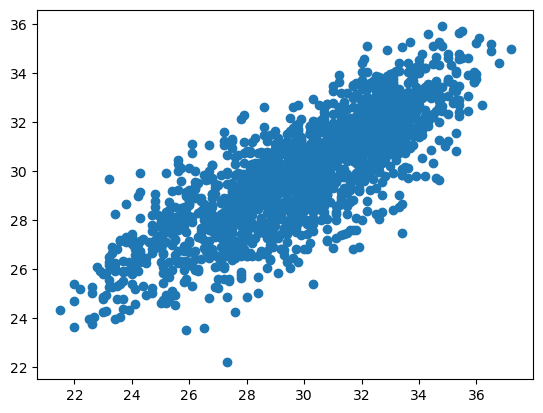

In [128]:
# RMSE is high now we check the relation using graph

plt.scatter(x=y_test,y=y_pred)

In [129]:
# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor

dec_tree=DecisionTreeRegressor()
dec_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [130]:
dec_tree.score(x_train,y_train)

1.0

In [131]:
dec_tree.score(x_test,y_test)

0.6834068304183818

In [132]:
pred1=dec_tree.predict(x_test)
pred1

array([26.7, 31. , 28.8, ..., 32.7, 26.1, 26.1])

In [133]:
r2=r2_score(y_test,pred1)
r2

0.6834068304183818

In [134]:
mae2=mean_absolute_error(y_test,pred1)
mae2

1.0886574074074074

In [135]:
mse2=mean_squared_error(y_test,pred1)
mse2

2.6310069444444446

In [136]:
rmse2=np.sqrt(mean_squared_error(y_test,pred1))
rmse2

1.6220378985845074

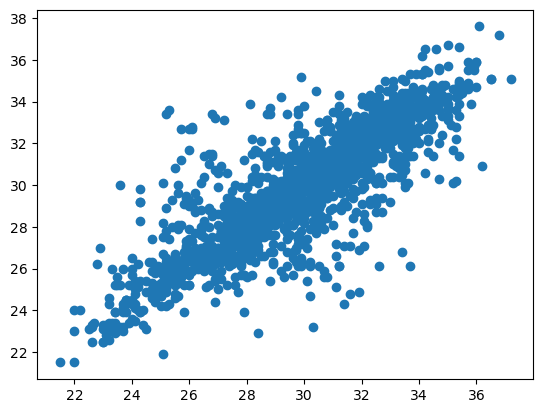

In [137]:
# RMSE score is higher than above model now we check the relation using graph.
# We use other model also, may be that model will perform batter than past model 

plt.scatter(x=y_test,y=pred1)

In [138]:
# AdaBoost Regressor Model

from sklearn.ensemble import AdaBoostRegressor

In [139]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [140]:
pred2=ada.predict(x_test)
pred2

array([25.86998445, 29.09240711, 26.9991119 , ..., 33.50350318,
       27.9996456 , 28.98035533])

In [141]:
r3=r2_score(y_test,pred2)
r3

0.6006099468576425

In [142]:
mae3=mean_absolute_error(y_test,pred2)
mae3

1.4920418593976998

In [143]:
mse3=mean_squared_error(y_test,pred2)
mse3

3.3190798296382105

In [144]:
rmse3=np.sqrt(mean_squared_error(y_test,pred2))
rmse3

1.8218341937833449

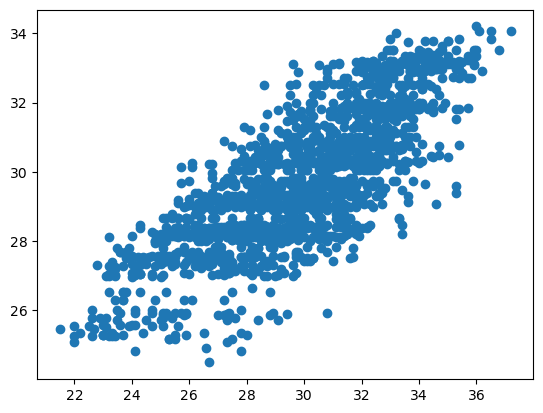

In [145]:
# RMSE score is batter than above model now we check the relation using graph.
# We use other model also, may be that model will perform batter than past model 

plt.scatter(x=y_test,y=pred2)

In [146]:
# Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
ran_forst=RandomForestRegressor()
ran_forst.fit(x_train,y_train)

RandomForestRegressor()

In [147]:
pred3=ran_forst.predict(x_test)
pred3

array([26.958, 31.05 , 28.614, ..., 33.158, 28.373, 26.82 ])

In [148]:
r4=r2_score(y_test,pred3)
r4

0.8608451084404509

In [149]:
mae4=mean_absolute_error(y_test,pred3)
mae4

0.7922818287037043

In [150]:
mse4=mean_squared_error(y_test,pred3)
mse4

1.156428884837964

In [151]:
rmse4=np.sqrt(mean_squared_error(y_test,pred3))
rmse4

1.0753738349234483

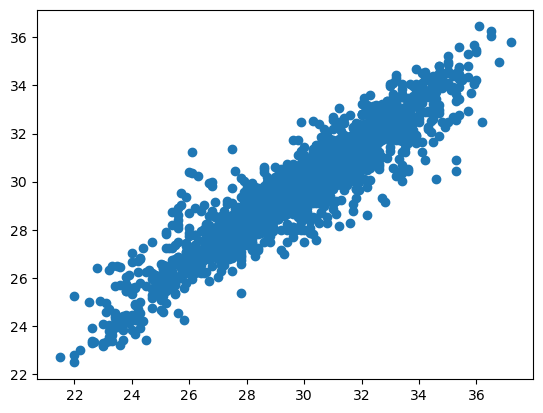

In [152]:
# RMSE score is good and this model is batter than all above model now we check the relation using graph.
# We use other model also, may be that model will perform batter than past model 

plt.scatter(x=y_test,y=pred3)

In [153]:
# KNN Regressor Model

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [154]:
pred4=knn.predict(x_test)
pred4

array([26.86, 31.48, 28.84, ..., 34.04, 27.46, 28.12])

In [155]:
r5=r2_score(y_test,pred4)
r5

0.7796949468597086

In [156]:
mae5=mean_absolute_error(y_test,pred4)
mae5

0.9927430555555555

In [157]:
mse5=mean_squared_error(y_test,pred4)
mse5

1.8308168981481483

In [158]:
rmse5=np.sqrt(mean_squared_error(y_test,pred4))
rmse5

1.353076826402754

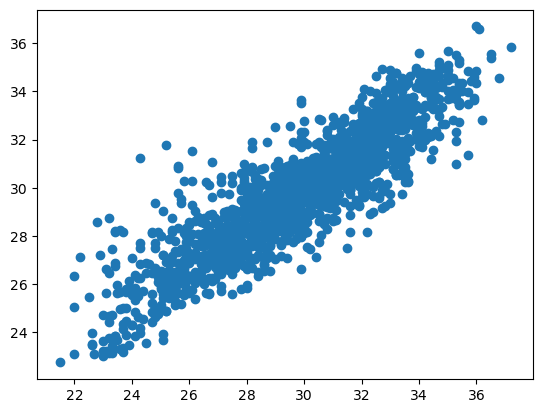

In [159]:
# RMSE score is good but not batter than above model now we check the relation using graph.
# We use other model also, may be that model will perform batter than past model 

plt.scatter(x=y_test,y=pred4)

In [160]:
# Gradient Boosting Regressor Model

from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

GradientBoostingRegressor()

In [161]:
pred5=gbdt.predict(x_test)
pred5

array([26.92507427, 30.2909903 , 26.44947666, ..., 33.44370705,
       27.9428202 , 27.84176485])

In [162]:
r6=r2_score(y_test,pred5)
r6

0.7526758614883866

In [163]:
mae6=mean_absolute_error(y_test,pred5)
mae6

1.1082154286423453

In [164]:
mse6=mean_squared_error(y_test,pred5)
mse6

2.0553555429282246

In [165]:
rmse6=np.sqrt(mean_squared_error(y_test,pred5))
rmse6

1.4336511231566154

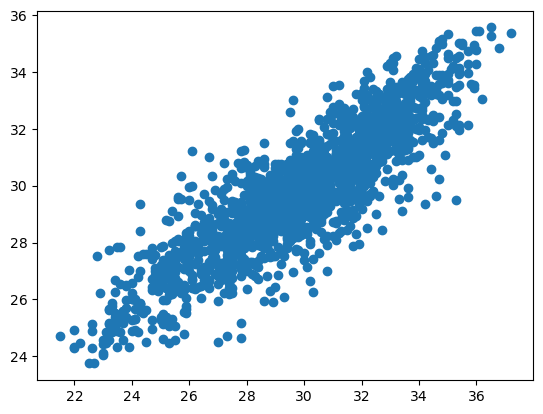

In [166]:
# RMSE score is good now we check the relation using graph.
# We use other model also, may be that model will perform batter than past model 

plt.scatter(x=y_test,y=pred5)

In [167]:
# SVR Model
from sklearn.svm import SVR
svr=SVR()  
svr.fit(x_train,y_train)

SVR()

In [168]:
pred6=svr.predict(x_test)
pred6

array([26.73002715, 31.05626116, 27.9486129 , ..., 32.86576237,
       27.63464804, 26.78370681])

In [169]:
r7=r2_score(y_test,pred6)
r7

0.7750869775293139

In [170]:
mae7=mean_absolute_error(y_test,pred6)
mae7

1.0120508045574315

In [171]:
mse7=mean_squared_error(y_test,pred6)
mse7

1.86911083646677

In [172]:
rmse7=np.sqrt(mean_squared_error(y_test,pred6))
rmse7

1.3671542840757842

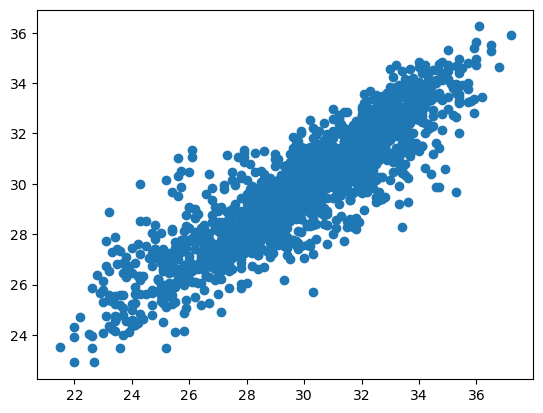

In [173]:
# RMSE score is good now we check the relation using graph.
# We use other model also, may be that model will perform batter than past model 

plt.scatter(x=y_test,y=pred6)

In [174]:
# Cross_Validation:

from sklearn.model_selection import cross_val_score


In [175]:
lnr_reg=cross_val_score(lin_reg,x_scaler,y,cv=5).mean()
lnr_reg

0.5131450062597199

In [176]:
dec_tr=cross_val_score(dec_tree,x_scaler,y,cv=5).mean()
dec_tr

0.0734411226886323

In [177]:
ada_reg=cross_val_score(ada,x_scaler,y,cv=5).mean()
ada_reg

0.4323139115066651

In [178]:
ran_reg=cross_val_score(ran_forst,x_scaler,y,cv=5).mean()
ran_reg

0.4741619055470803

In [179]:
knn_reg=cross_val_score(knn,x_scaler,y,cv=5).mean()
knn_reg

0.20650630319444466

In [180]:
gbdt_reg=cross_val_score(gbdt,x_scaler,y,cv=5).mean()
gbdt_reg

0.513865891477265

In [181]:
svr_reg=cross_val_score(svr,x_scaler,y,cv=5).mean()
svr_reg

0.4262595172304007

In [182]:
models = pd.DataFrame({'Model': ['Linear_Regression','Decision Tree','AdaBoost','Random_Forest','KNN_Model','GBDT','Support Vector Machines'],
                       'R2 Score Result':[r1,r2,r3,r4,r5,r6,r7],'MAE Result':[mae1,mae2,mae3,mae4,mae5,mae6,mae7],
                       'MSE Result':[mse1,mse2,mse3,mse4,mse5,mse6,mse7],'RMSE Result':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7],
                       'Cross Validation Score':[lnr_reg,dec_tr,ada_reg,ran_reg,knn_reg,gbdt_reg,svr_reg]})
models

,Model,R2 Score Result,MAE Result,MSE Result,RMSE Result,Cross Validation Score
0,Linear_Regression,0.638114,1.376501,3.007407,1.734188,0.513145
1,Decision Tree,0.683407,1.088657,2.631007,1.622038,0.073441
2,AdaBoost,0.600610,1.492042,3.319080,1.821834,0.432314
3,Random_Forest,0.860845,0.792282,1.156429,1.075374,0.474162
4,KNN_Model,0.779695,0.992743,1.830817,1.353077,0.206506
5,GBDT,0.752676,1.108215,2.055356,1.433651,0.513866
6,Support Vector Machines,0.775087,1.012051,1.869111,1.367154,0.426260


In [183]:
# In above DataFrame we can see Random Forest model performing better than other models so we use hyperparameter tunning
# for Random Forest model.


In [184]:
params={'n_estimators':[4,5],'max_depth':[10,15],'min_samples_leaf':[5,6],
        'min_samples_split':[10,11]}

In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
grid_search = GridSearchCV(ran_forst,params,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [4, 5]})

In [187]:
grid_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 5}

In [188]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=6, min_samples_split=10,
                      n_estimators=5)

In [196]:
# Final Model

final_model=RandomForestRegressor(max_depth=15, min_samples_leaf=6, min_samples_split=10,n_estimators=5)
final_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=6, min_samples_split=10,
                      n_estimators=5)

In [197]:
predd=final_model.predict(x_test)
predd

array([26.67833333, 31.06023019, 28.91163087, ..., 33.6585974 ,
       28.3938961 , 27.79556638])

In [198]:
r2_score(y_test,predd)

0.8046736424283575

In [199]:
mean_absolute_error(y_test,predd)

0.9359759900352005

In [200]:
mean_squared_error(y_test,predd)

1.6232346512186666

In [201]:
np.sqrt(mean_squared_error(y_test,predd))

1.274062263477993

In [195]:
# End of Project 2 of Phase 2